### Wstęp do Uczenia Maszynowego 
##### Laboratorium 2

### 1. Podstawy drzew decyzyjnych - klasyfikacja

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
pima = pd.read_csv("pima.csv")
# pima = pd.read_csv("link do raw GitHub")

*Więcej o danych:* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
# Zbiór danych nie zawiera braków danych.
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

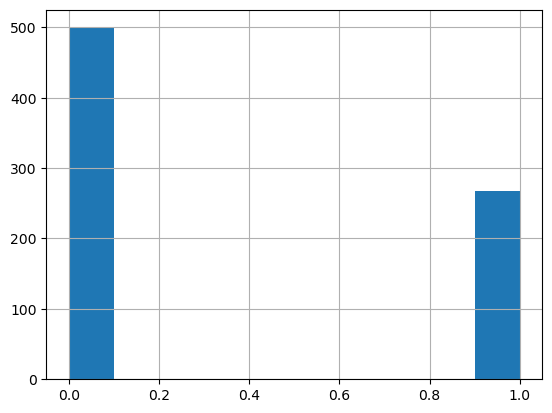

In [4]:
# Liczba obserwacji w klasie 0 i klasie 1 nie jest równa. Obserwacji z klasy 0 jest prawie dwa razy więcej niż obserwacji z klasy 1.
pima["Outcome"].hist()

### Kryterium podziału
a) wskaźnik błędu klasyfikacji (*classification error rate*) = udział obserwacji ze zbioru treningowego w danym regionie, które nie należą do przeważającej klasy.

$$E = 1 - max_{k}(\hat{p}_{mk}) $$

$\hat{p}_{mk}$ - proporcja obserwacji zbioru treningowego w m-tym regionie pochodząca z k-tej klasy

b) indeks Giniego

$$G = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$$
Indeks Giniego przyjmuje małe wartości jeżeli $\hat{p}_{mk}$ jest bliski 0 lub 1. Z tego powodu indeks Giniego jest określany jako miara czystości węzła (*node purity*) - mała wartość wskazuje, że węzeł zawiera głównie obserwacje z jednej klasy.

c) entropia

$$D = - \sum_{k=1}^{K}\hat{p}_{mk}log\hat{p}_{mk}$$

$0 \leq \hat{p}_{mk} \leq 1 \ \rightarrow 0 \leq -\hat{p}_{mk}log\hat{p}_{mk}$

Podobnie jak indeks Giniego przyjmuje małe wartości (bliskie zero) gdy $\hat{p}_{mk}$ jest bliskie 0 lub 1.

Dokumentacja:
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

##### *Zadanie 1*
------------------------

Przygotuj zbiór danych `pima` do dalszej pracy. Podziel na *X* i *y*, a następnie na zbiór treningowy i testowy w proporcji 7:3.

In [5]:
y = pima.Outcome
X = pima.drop(["Outcome"], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

##### *Zadanie 2*
---------------
Zbuduj model drzewa dla danych z *Zadania 1*.

In [7]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Macierz pomyłek (*ang. confusion matrix*)

<img src="confusion_matrix.png"  width="500"/>

##### *Zadanie 3*
-----------------
Wyznacz macierz pomyłek dla predykcji na danych treningowych.

In [8]:
from sklearn.metrics import confusion_matrix

pred_train = Tree.predict(X_train)
pred_test = Tree.predict(X_test)

confusion_matrix(y_train, pred_train)

array([[357,   0],
       [  0, 180]], dtype=int64)

Jak odczytać powstałą macierz pomyłek w pakiecie `scikit-learn`?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 


In [ ]:
# tp, fp, fn, tn = ?

In [9]:
tn, fp, fn, tp = confusion_matrix(y_train, pred_train).ravel()
(tn, fp, fn, tp)

(357, 0, 0, 180)

##### *Zadanie 4*
-------------
Policz następujące miary dla otrzymanych predykcji na zbiorze treningowym.

a) dokładność (*accuracy*)

b) czułość (*sensitivity, recall*)

c) precyzja (*precision*)

d) F1-score 

Powtórz obliczenia dla zbioru testowego.

*Zbiór treningowy*

In [10]:
# a) accuracy
(tp + tn)/X_train.shape[0]

1.0

In [11]:
# b) recall
tp/(tp + fn)

1.0

In [12]:
# c) precision
tp/(tp + fp)


1.0

In [13]:
# d) f1-score
2*tp/(2*tp + fp + fn)

1.0

*Zbiór testowy*

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("accuracy: %0.3f" % (accuracy_score(y_test, pred_test)))
print("recall: %0.3f" % (recall_score(y_test, pred_test)))
print("precision: %0.3f" % (precision_score(y_test, pred_test)))
print("f1 score: %0.3f" % (precision_score(y_test, pred_test)))

accuracy: 0.714
recall: 0.602
precision: 0.631
f1 score: 0.631


### Zbiór walidaycjny?

##### *Zadanie 5*
-------------
Podziel zbiór `pima` na zbiór treningowy, walidacyjny i testowy (6:2:2).

In [ ]:
Tree = tree.DecisionTreeClassifier(random_state=0)
path = Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(Tree)


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
alpha_opt = 